<a href="https://colab.research.google.com/github/1nt18is143/Sharada_supervisedML_Spark_internship/blob/main/Unsupervised_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

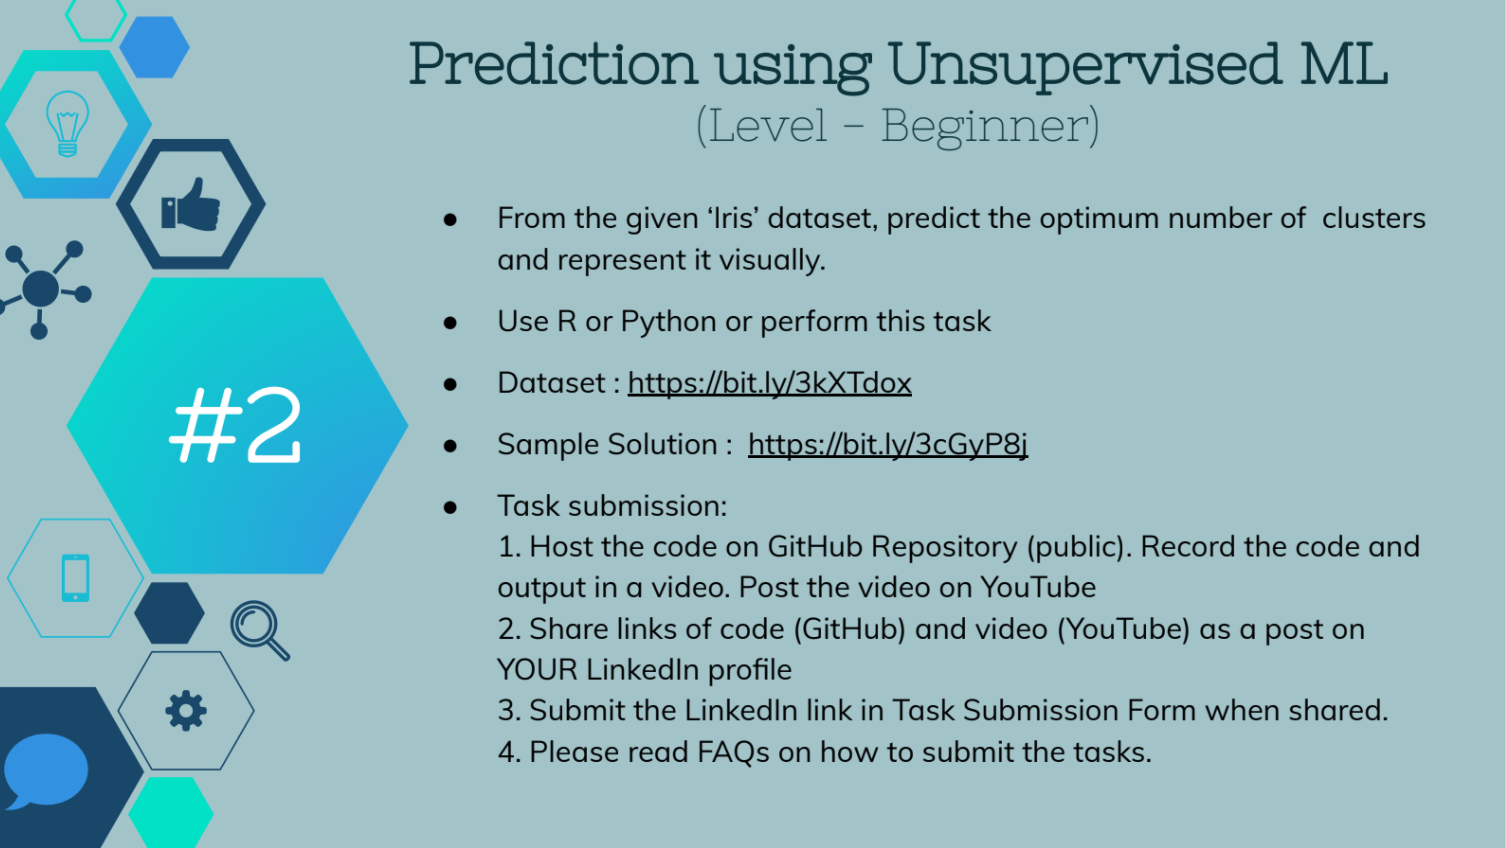

THE SPARKS FOUNDATION

TASK 2 - Prediction using Unupervised ML

From the given ‘Iris’ dataset, predict the optimum number of clusters
and represent it visually.

Author : Sharada Manjunath Gouda

In [ ]:
#Importing necessay libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [ ]:
#Loading data in DataFrame
df = pd.read_csv("/content/iris (1).csv", index_col = 0)
df.head()

,sepal width,petal length,petal width,species
sepal length,,,,
5.1,3.5,1.4,0.2,1
4.9,3.0,1.4,0.2,1
4.7,3.2,1.3,0.2,1
4.6,3.1,1.5,0.2,1
5.0,3.6,1.4,0.2,1


In [ ]:
df.shape

(150, 4)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 150 entries, 5.1 to 5.9
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal width   150 non-null    float64
 1   petal length  150 non-null    float64
 2   petal width   150 non-null    float64
 3   species       150 non-null    int64  
dtypes: float64(3), int64(1)
memory usage: 5.9 KB


In [ ]:
df.describe()

,sepal width,petal length,petal width,species
count,150.000000,150.000000,150.000000,150.000000
mean,3.057333,3.758000,1.199333,2.000000
std,0.435866,1.765298,0.762238,0.819232
min,2.000000,1.000000,0.100000,1.000000
25%,2.800000,1.600000,0.300000,1.000000
50%,3.000000,4.350000,1.300000,2.000000
75%,3.300000,5.100000,1.800000,3.000000
max,4.400000,6.900000,2.500000,3.000000


First we need to find the optimum number of clusters for K-Means. 

Here we will use The Elbow Method to determine the value of k in K-Means.

The Elbow Method

In Elbow method we calculate the Within-Cluster-Sum of Squared Errors (WCSS) for different values of k, and choose the k for which WCSS becomes first starts to diminish. 

In the plot of WCSS-versus-k, this is visible as an elbow.

In [ ]:
x = df.iloc[:, :4].values
from sklearn.cluster import KMeans

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', 
                    max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

pd.DataFrame({"Number of Clusters":range(1,11),"WCSS":wcss})

,Number of Clusters,WCSS
0,1,679.202267
1,2,130.363200
2,3,50.119671
3,4,39.188333
4,5,29.295494
5,6,25.064848
6,7,21.746800
7,8,19.355246
8,9,17.537310
9,10,16.231376


Plotting Number of Clusters vs. WCSS

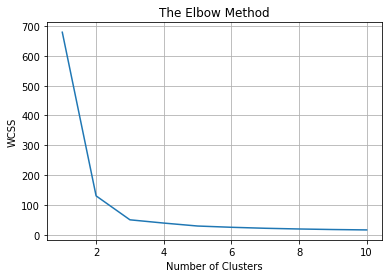

In [ ]:
plt.plot(range(1,11), wcss)
plt.title("The Elbow Method")
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.grid()
plt.show()

As expected, the plot looks like an arm with a clear elbow at k = 3.

**Applying** k-means to the dataset with Number of Clusters as k = 3

In [ ]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', 
                    max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)

**Visualizing the clusters on the first two columns**

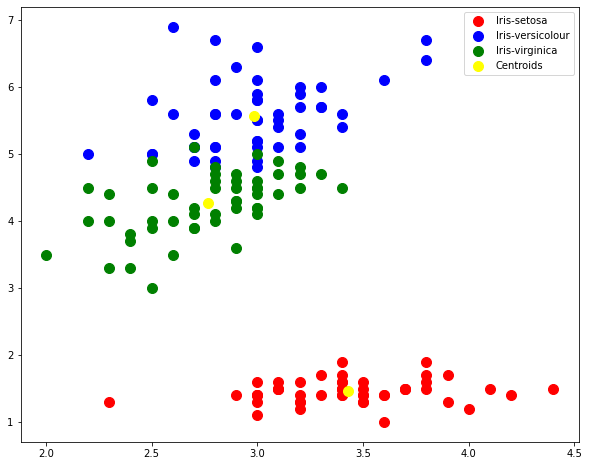

In [ ]:
plt.figure(figsize=[10,8])
plt.scatter(x[y_kmeans == 0,0], x[y_kmeans == 0,1], 
            s = 100, c = "red", label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], 
            s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1],
            s = 100, c = 'green', label = 'Iris-virginica')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 100, c = 'yellow', label = 'Centroids')

plt.legend()
plt.show()


**Visualizing the clusters on the first three columns**

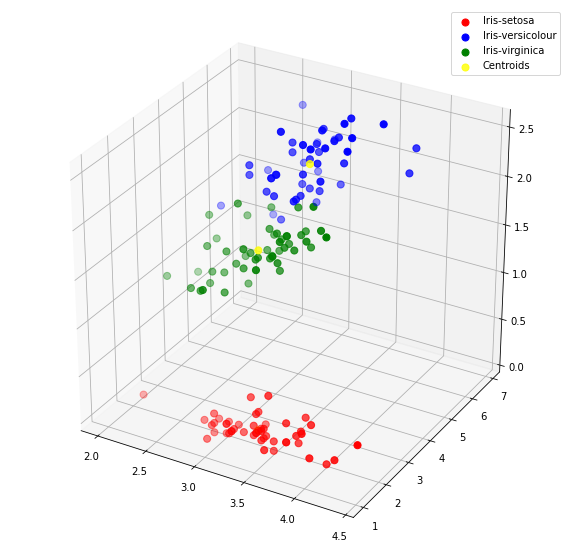

In [ ]:
plt.figure(figsize=[10,10])
ax = plt.axes(projection ="3d")
ax.scatter3D(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], x[y_kmeans == 0, 2], 
             s = 50, c = "red", label = 'Iris-setosa')
ax.scatter3D(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], x[y_kmeans == 1, 2], 
             s = 50, c = 'blue', label = 'Iris-versicolour')
ax.scatter3D(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], x[y_kmeans == 2, 2], 
             s = 50, c = 'green', label = 'Iris-virginica')

ax.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], kmeans.cluster_centers_[:,2],
            s = 50, c = 'yellow', label = 'Centroids', alpha = 0.8)

plt.legend()
plt.show()